## Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

### Домашнее задание

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.
2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE добавить норму весов, а в поправку нужно добавить производную для нормы вектора весов по весам) и сравнить результаты.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# сгенерируем набор данных
n_features = 2
n_objects = 5000

data, target, coef = datasets.make_regression(n_samples=n_objects, n_features=n_features, noise=5, coef=True, random_state=42)

In [3]:
data

array([[ 0.41960997, -0.09445871],
       [-1.01264444, -1.19418665],
       [-0.03120349, -0.8634936 ],
       ...,
       [-1.4069434 ,  0.31996519],
       [ 1.64267295, -1.18941189],
       [ 1.47535622,  0.31090757]])

In [4]:
target

array([  8.54788622, -35.11624464, -29.70060989, ...,  -0.14151667,
       -17.1555224 ,  27.93493887])

In [5]:
coef

array([10.30191944, 32.12551734])

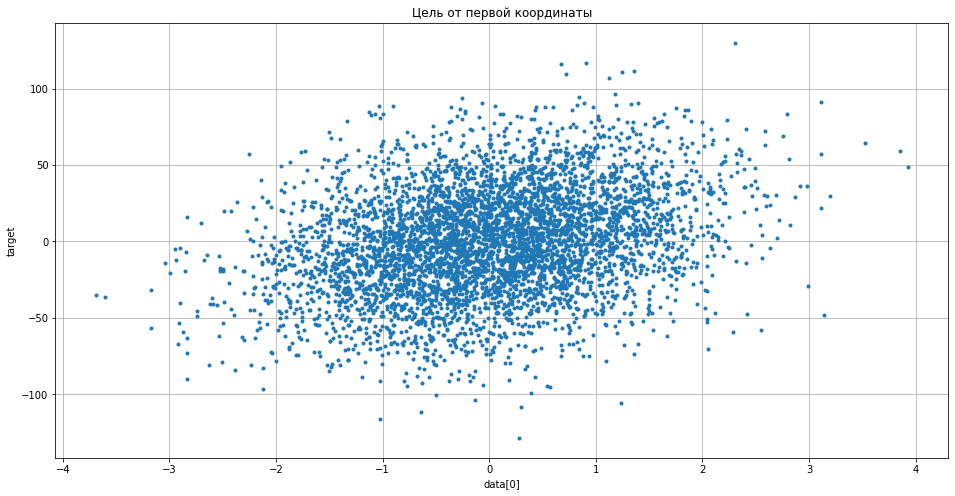

In [6]:
plt.figure(figsize=(16, 8))
plt.plot(data[:, 0], target, '.')
plt.grid(True)

plt.xlabel('data[0]')
plt.ylabel('target')
plt.title('Цель от первой координаты')
plt.show()

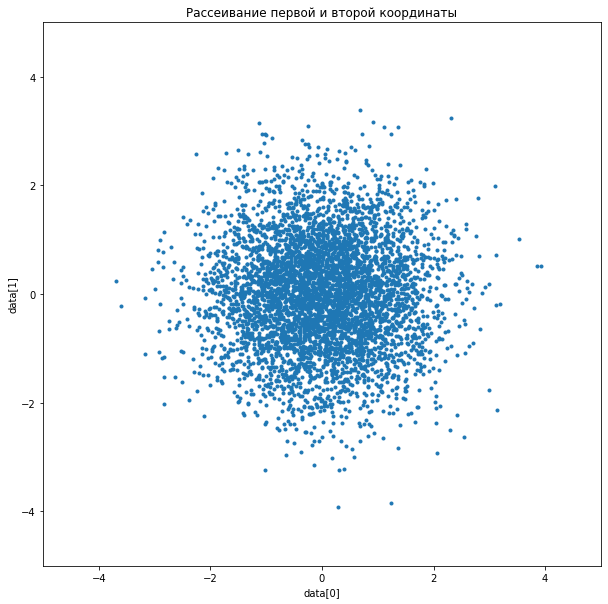

In [7]:
plt.figure(figsize=(10, 10))
plt.plot(data[:, 0], data[:, 1], '.')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.xlabel('data[0]')
plt.ylabel('data[1]')
plt.title('Рассеивание первой и второй координаты')
plt.show()

In [8]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

### Градиентный спуск

In [9]:
w = np.zeros(n_features)

In [10]:
# список векторов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.1

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой агоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счётчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - target)) / target.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования градиентноо спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования градиентноо спуска функционал ошибки составляет 24.9267


In [11]:
errors_grad = errors

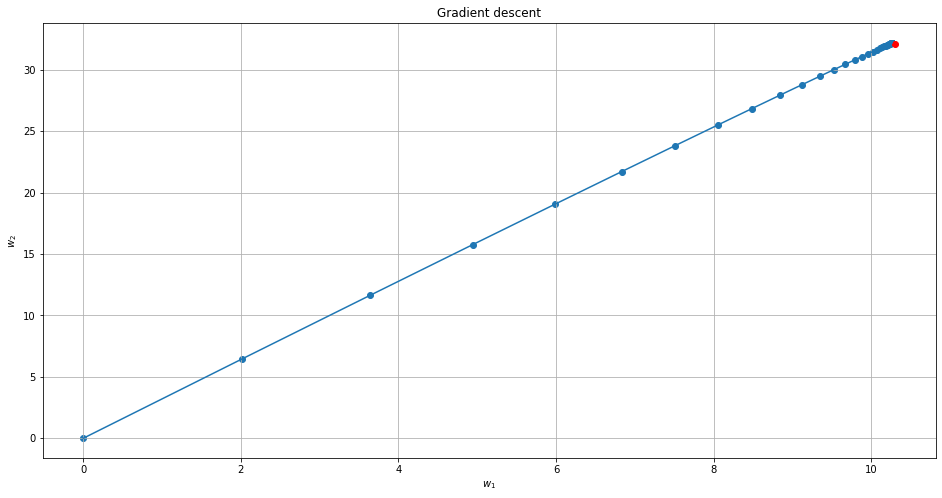

In [12]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(16, 8))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])
plt.grid(True)
plt.show()

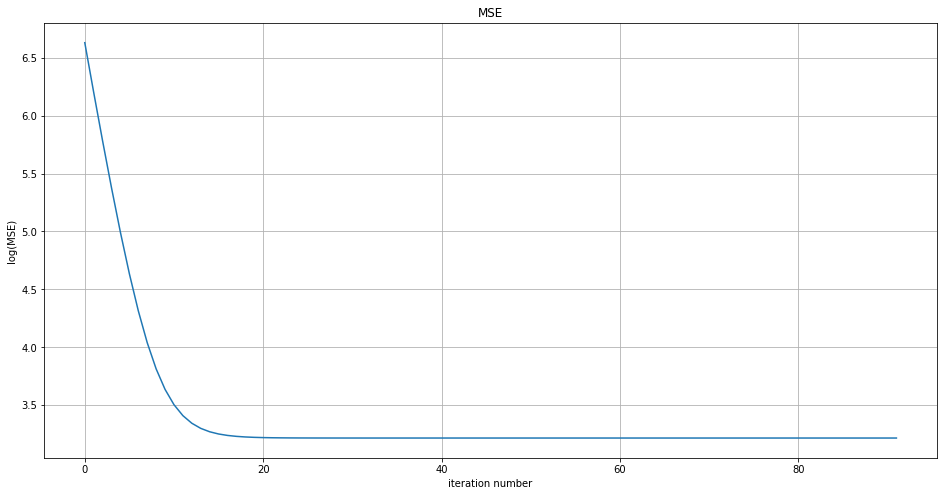

In [13]:
# визуализируем изменение функционала ошибки
plt.figure(figsize=(16, 8))
plt.plot(range(len(errors_grad)), np.log(errors_grad))
plt.title('MSE')
plt.xlabel('iteration number')
plt.ylabel('log(MSE)')
plt.grid(True)
plt.show()

### Стохастический градиентный спуск

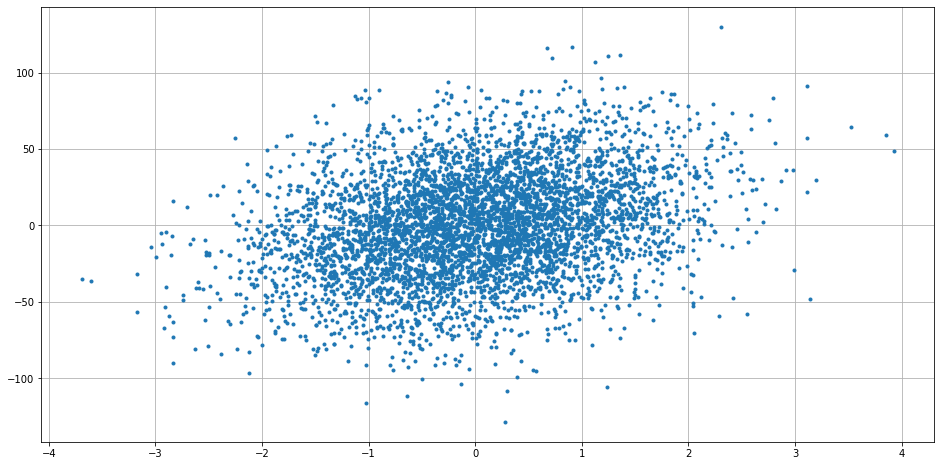

In [14]:
plt.figure(figsize=(16, 8))
plt.plot(data[:, 0], target, '.')
plt.grid(True)
plt.show()

In [15]:
# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.05

# максимальной число итераций
max_iter = 1e4

# критерий сходимости (разница весовб при которой алгритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счётчик итераций
iter_num = 0
lamb = 0.01
np.random.seed(1234)
Q = [np.sum((np.dot(data, w) - target) ** 2)]

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind]))
    
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    
    Q.append(Q[-1] * (1 - lamb) + lamb * (np.dot(data[train_ind], w) - target[train_ind]) ** 2)
    iter_num += 1
    w = new_w
    

w_list = np.array(w_list)
    
print(f'В случае использования сточастического градиентного спуска функционал ошибки составляет {round(Q[-1], 4)}')

В случае использования сточастического градиентного спуска функционал ошибки составляет 25.2004


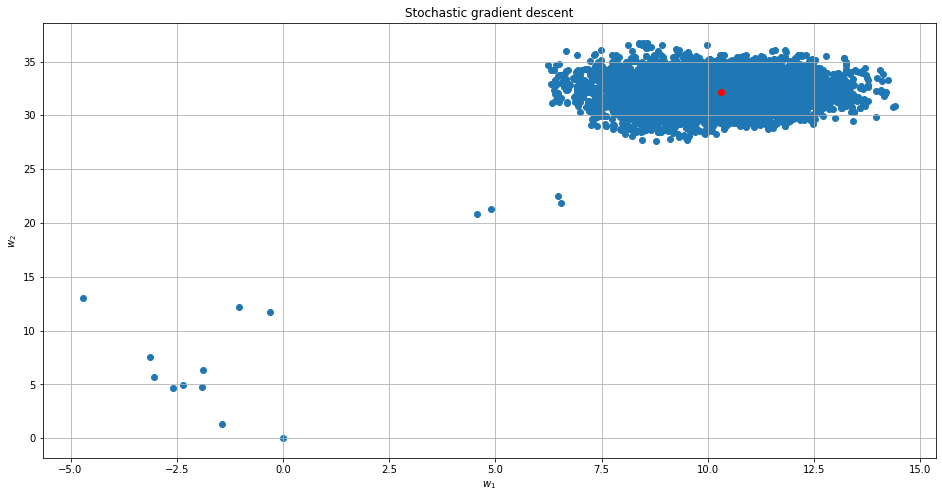

In [16]:
# визуализируем изменение весов (красной точкой обозначаются веса, сгенерированные вначале)
plt.figure(figsize=(16, 8))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.grid(True)
plt.show()

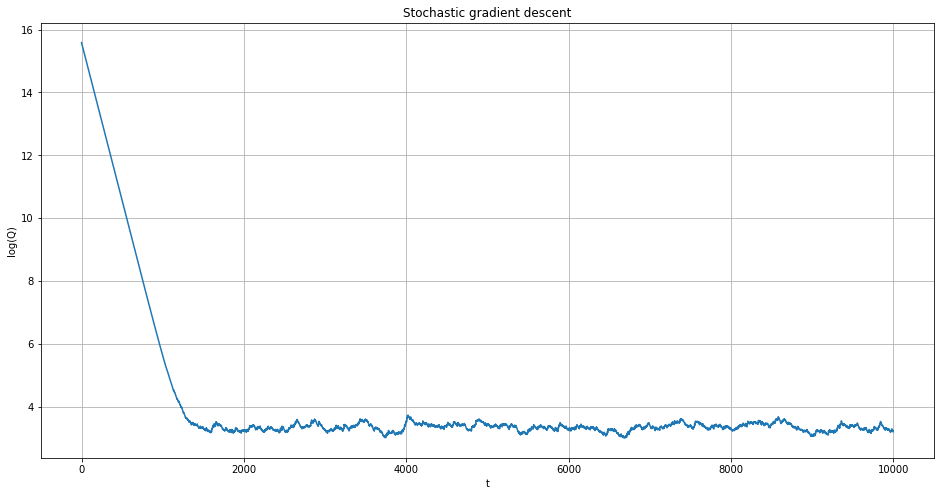

In [17]:
# визуализируем изменений весов
plt.figure(figsize=(16, 8))
plt.title('Stochastic gradient descent')
plt.xlabel('t')
plt.ylabel('log(Q)')
plt.plot(np.log(Q))
plt.grid(True)
plt.show()

#### Среднеквадратичная ошибка для обоих методов на одном графике

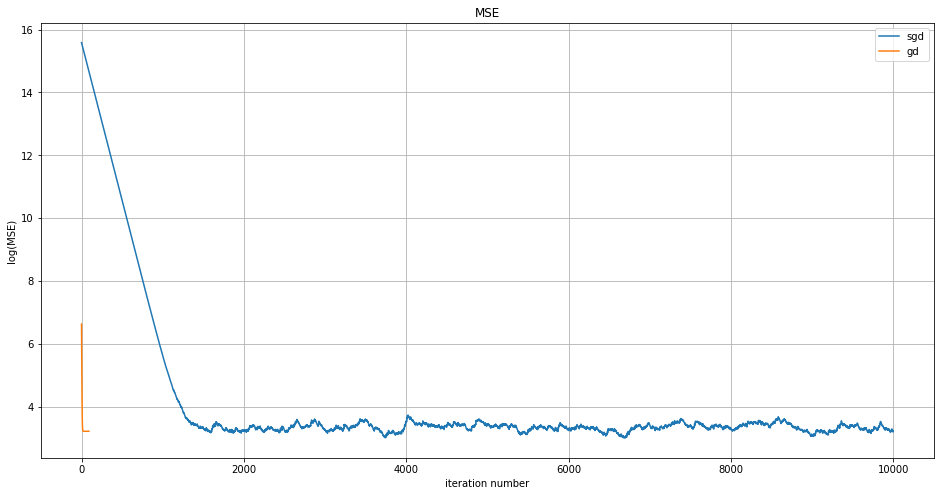

In [18]:
# визуализируем изменений функционала ошибки
plt.figure(figsize=(16, 8))
plt.plot(range(len(Q)), np.log(Q), label='sgd')
plt.plot(range(len(errors_grad)), np.log(errors_grad), label='gd')
plt.title('MSE')
plt.legend()
plt.xlabel('iteration number')
plt.ylabel('log(MSE)')
plt.grid(True)
plt.show()

### Вывод по скорости сходимости

Получается, что градиентный спуск выдаёт большую ошибку в самом начале, но затем очень быстро сводит её к нулю. Стохастический градиентный спуск же изначально даёт очень маленькую (по сравнению с ГС) ошибку, но к нулю сводит её гораздо медленнее, т.е. через большее кол-во итераций. При этом стохастический градиентный спуск потребляет меньше ресурсов.

В итоге для малых объёмов лучше подойдёт обынчый градиентный спуск, а для больших - стохастический.

### L2 регуляризация

In [19]:
# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.0015

# максимальной число итераций
max_iter = 1e4

# критерий сходимости (разница весовб при которой алгритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счётчик итераций
iter_num = 0
lamb = 0.1

# коэффициент L2 регуляризации
L2_lamb = 1e-2

np.random.seed(1234)
Ql2 = [np.sum((np.dot(data, w) - target) ** 2)]

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) - 2 * eta * L2_lamb * w
    
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    Ql2.append(Ql2[-1] * (1 - lamb) + lamb * ((np.dot(data[train_ind], w) - target[train_ind]) ** 2 + L2_lamb * np.sum(np.square(w))))
    iter_num += 1
    w = new_w
    

w_list = np.array(w_list)
    
print(f'В случае использования сточастического градиентного спуска функционал ошибки составляет {round(Q[-1], 4)}')

В случае использования сточастического градиентного спуска функционал ошибки составляет 25.2004


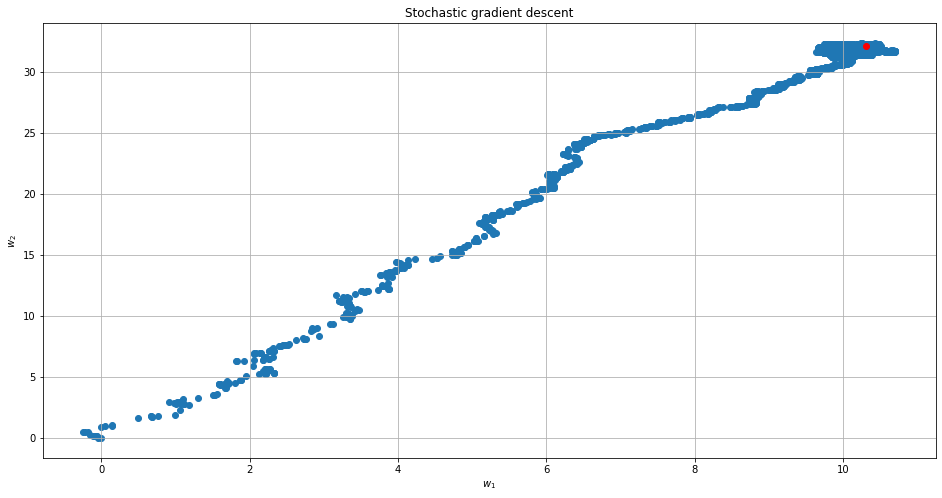

In [20]:
# визуализируем изменение весов (красной точкой обозначаются веса, сгенерированные вначале)
plt.figure(figsize=(16, 8))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.grid(True)
plt.show()

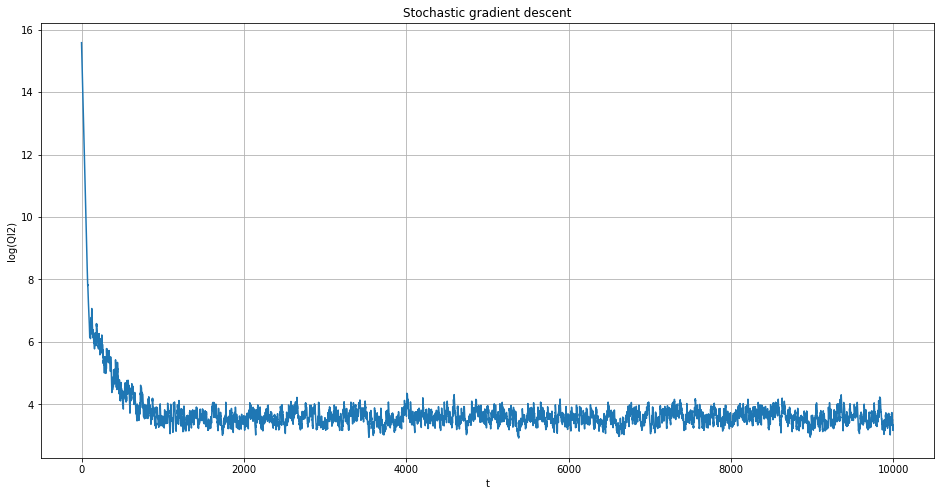

In [21]:
# визуализируем изменений весов
plt.figure(figsize=(16, 8))
plt.title('Stochastic gradient descent')
plt.xlabel('t')
plt.ylabel('log(Ql2)')
plt.plot(np.log(Ql2))
plt.grid(True)
plt.show()

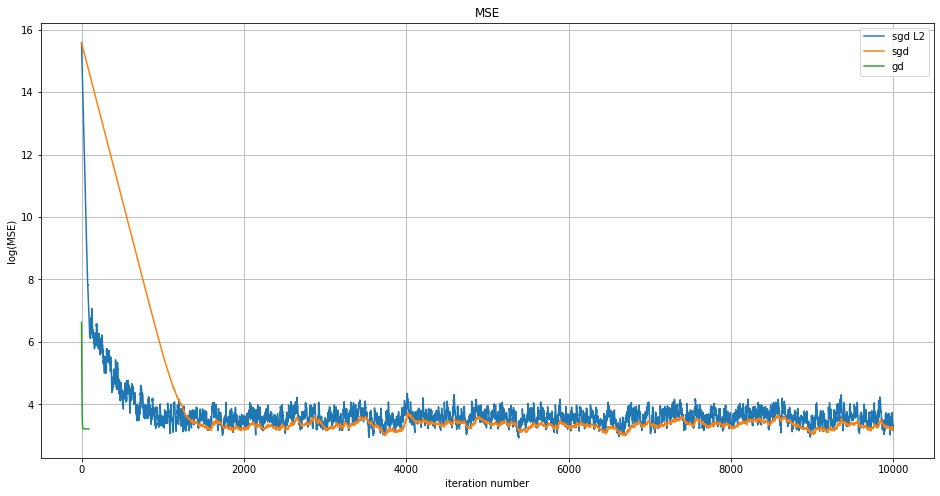

In [22]:
# визуализируем изменений функционала ошибки
plt.figure(figsize=(16, 8))
plt.plot(range(len(Ql2)), np.log(Ql2), label='sgd L2')
plt.plot(range(len(Q)), np.log(Q), label='sgd')
plt.plot(range(len(errors_grad)), np.log(errors_grad), label='gd')
plt.title('MSE')
plt.legend()
plt.xlabel('iteration number')
plt.ylabel('log(MSE)')
plt.grid(True)
plt.show()

В результате добавления в модель регуляризации сходимость существенно ускорилась.